In [105]:
import numpy as np
import matplotlib.pyplot as plt
from pyhdf.SD import SD, SDC


from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
os.getcwd()
path1 = 'E:\\SIF data\\FPAR_2016'
path2 = 'E:\\SIF data\\GOME_2016\\GOME_2016\\'
os.chdir('E:\\SIF data\\FPAR_2016')
# os.chdir('E:\\SIF data\\OCO_2016')
# os.chdir(path2)
%matplotlib inline
raw_data = SD('FPAR_A2016233.hdf', SDC.READ)

In [2]:
import numpy as np
from shapely.geometry import Point
from shapely.geometry import Polygon

In [71]:
gnome_test_data = Dataset('08\\ret_f_nr5_nsvd12_v26_waves734_nolog.20160801_v27_all.nc')

In [9]:
# for i in gnome_test_data.variables:
#     print(i)
raw_data = SD('FPAR_A2016009.hdf', SDC.READ)
raw_data.select('Fpar_500m')[:].shape

(3678, 10145)

In [67]:
p = Polygon([(-88, 40), (-87, 40.5), (-86.5, 41.5), (-87.5, 41)])
# p = Polygon([(50, -160), (51, -159), (52, -159), (51, -162)])
# ILLINOIS = (36.7281, -91.8524, 42.493703, -87.020001)

False

In [16]:
#find gnome boxes inside illinois

lon_corners = gnome_test_data.variables["Longitude_corners"]
lat_corners = gnome_test_data.variables["Latitude_corners"]


#kd tree?
gnome_polygons = []
for i in range(len(lon_corners)):
    if (lon_corners[i][0] >= ILLINOIS[1] and lon_corners[i][0] <= ILLINOIS[3]) and \
    (lat_corners[i][0] >= ILLINOIS[0] and lat_corners[i][0] <= ILLINOIS[2]):
        
        #TODO add gnome filter
        p1 = (lon_corners[i][0], lat_corners[i][0])
        p2 = (lon_corners[i][1], lat_corners[i][1])
        p3 = (lon_corners[i][3], lat_corners[i][3])
        p4 = (lon_corners[i][2], lat_corners[i][2])
               
        gnome_box = Polygon([p1, p2, p3, p4])
        gnome_polygons.append(gnome_box)


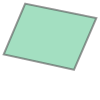

In [60]:
gnome_polygons[4]

In [8]:
oco_test_data = Dataset('05\\oco2_LtSIF_160504_B7302r_160720173141s.nc4')

(array([  5.10000000e+01,   9.34000000e+02,   9.27500000e+03,
          4.34640000e+04,   5.08100000e+04,   1.57340000e+04,
          2.86000000e+03,   2.99000000e+02,   1.10000000e+01,
          3.00000000e+00]),
 array([-2.67721701, -1.97835369, -1.27949038, -0.58062706,  0.11823626,
         0.81709957,  1.51596289,  2.2148262 ,  2.91368952,  3.61255283,
         4.31141615]),
 <a list of 10 Patch objects>)

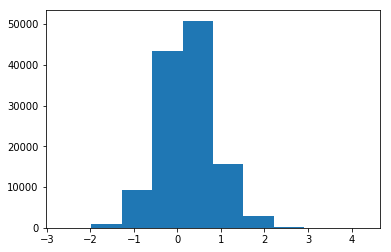

In [33]:
plt.hist(oco_sifs)

In [14]:
#find oco boxes inside illinois


area = []
desired_sif = []

oco_lat_corners = oco_test_data.variables['footprint_vertex_latitude'][:]
oco_lon_corners = oco_test_data.variables['footprint_vertex_longitude'][:]
oco_sifs = oco_test_data.variables['SIF_757nm'][:]


oco_illinois = []
oco_illinois_sifs = []
for i in range(len(oco_lon_corners)):
    if (oco_lon_corners[i][0] >= ILLINOIS[1] and oco_lon_corners[i][0] <= ILLINOIS[3]) and \
    (oco_lat_corners[i][0] >= ILLINOIS[0] and oco_lat_corners[i][0] <= ILLINOIS[2]):
        
        
        #add filter
        #add cdl data filter
        oco_illinois.append([oco_lon_corners[i], oco_lat_corners[i]])
        oco_illinois_sifs.append(oco_sifs[i])


In [23]:
area = []
desired_sif = []
chosen_area = None

for j in range(len(gnome_polygons)):
    g_area = gnome_polygons[j]
    desired_sif = []
    area = []
    
    for i in range(len(oco_illinois)):
        p = Point(oco_illinois[i][0][0], oco_illinois[i][1][0])
        if g_area.contains(p):
            desired_sif.append(oco_illinois_sifs[i])
            area.append([oco_illinois[i][0], oco_illinois[i][1]])

    if area != []:
        chosen_area = g_area
        break

verifying
202 202
85 85
POLYGON ((-87.12796783447266 42.12539672851563, -86.95050048828125 42.52025985717773, -88.55459594726563 42.90095138549805, -88.71170043945313 42.53056335449219, -87.12796783447266 42.12539672851563))


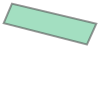

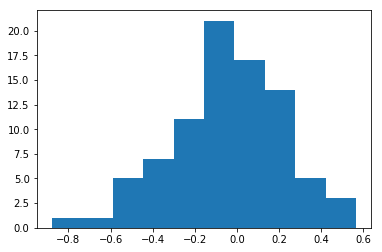

In [68]:

print('verifying')

print(len(oco_illinois), len(oco_illinois_sifs))

print(len(desired_sif), len(area))

plt.hist(desired_sif)

print(chosen_area)
chosen_area

[array([-87.13839722, -87.14543152, -87.1386261 , -87.13159943], dtype=float32), array([ 42.13482285,  42.15303802,  42.14352417,  42.12530899], dtype=float32)]


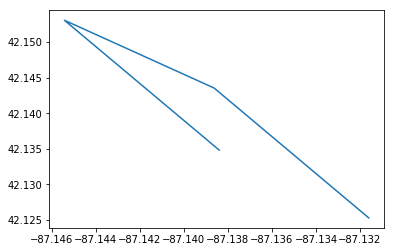

In [46]:
test_oco_box = area[0]
#1432
p1 = (test_oco_box[0][0], test_oco_box[1][0])
p2 = (test_oco_box[0][3], test_oco_box[1][3])
p3 = (test_oco_box[0][2], test_oco_box[1][2])
p4 = (test_oco_box[0][1], test_oco_box[1][1])

plt.plot(area[0][0], area[0][1])
print(area[0])
test_polygon = Polygon([p1, p2, p3, p4])
    



In [55]:
#getting fpar

from my_functions import coords_to_ind


import numpy as np
for i in np.arange(min(test_oco_box[0]), max(test_oco_box[0]), 0.006):
    for j in np.arange(min(test_oco_box[1]), max(test_oco_box[1]), 0.004):
        
        print(i,j)

-87.1454315186 42.1253089905
-87.1454315186 42.1293089905
-87.1454315186 42.1333089905
-87.1454315186 42.1373089905
-87.1454315186 42.1413089905
-87.1454315186 42.1453089905
-87.1454315186 42.1493089905
-87.1394315186 42.1253089905
-87.1394315186 42.1293089905
-87.1394315186 42.1333089905
-87.1394315186 42.1373089905
-87.1394315186 42.1413089905
-87.1394315186 42.1453089905
-87.1394315186 42.1493089905
-87.1334315186 42.1253089905
-87.1334315186 42.1293089905
-87.1334315186 42.1333089905
-87.1334315186 42.1373089905
-87.1334315186 42.1413089905
-87.1334315186 42.1453089905
-87.1334315186 42.1493089905


In [9]:
gnome_test_data = Dataset('08\\ret_f_nr5_nsvd12_v26_waves734_nolog.20160801_v27_all.nc')

In [29]:
cur_data.variables['Longitude_corners'][:]

array([[-162.73866272, -161.11044312, -163.13847351, -161.51272583],
       [-162.73866272, -161.11044312, -163.41612244, -161.79342651],
       [-163.3377533 , -161.71464539, -164.04302979, -162.42326355],
       ..., 
       [ 145.1022644 ,  145.26411438,  142.3263855 ,  142.50340271],
       [ 142.40600586,  142.58261108,  139.69844055,  139.89016724],
       [ 139.76766968,  139.95896912,  137.08872986,  137.29917908]], dtype=float32)

In [30]:
cur_data.variables['Latitude_corners'][:]

array([[ 75.94194031,  76.0980835 ,  76.21187592,  76.36787415],
       [ 75.94194031,  76.0980835 ,  76.3137207 ,  76.47038269],
       [ 76.26849365,  76.42510986,  76.63511658,  76.79251862],
       ..., 
       [-58.29808807, -57.87671661, -57.99367142, -57.6099968 ],
       [-58.00455093, -57.61994553, -57.65233612, -57.29317474],
       [-57.66324997, -57.30360031, -57.25914383, -56.91117477]], dtype=float32)

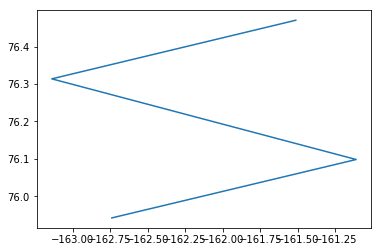

In [34]:
import matplotlib.pyplot as plt

plt.plot(cur_data.variables['Longitude_corners'][:][0] , cur_data.variables['Latitude_corners'][:][1])

In [19]:
#filter out all lon corners and lat corners in Illinois
#then find OCO2 footprints


# oco_data = Dataset('05\\oco2_LtSIF_160504_B7302r_160720173141s.nc4')
#then find related fpars
#then find related cdls






solar_zenith_angle
sensor_zenith_angle
sensor_azimuth_angle
solar_azimuth_angle
time
longitude
latitude
footprint
sounding_id
measurement_mode
surface_altitude
daily_correction_factor
reduced_chi2_757nm
reduced_chi2_771nm
continuum_radiance_757nm
continuum_radiance_771nm
SIF_757nm
SIF_771nm
uncorrected_SIF_757nm
uncorrected_SIF_771nm
SIF_757nm_uncert
SIF_771nm_uncert
SIF_757nm_relative
SIF_771nm_relative
uncorrected_SIF_757nm_relative
uncorrected_SIF_771nm_relative
orbit_number
IGBP_index
footprint_vertex_latitude
footprint_vertex_longitude
[6 7 8 ..., 3 4 6]


(array([ 12936.,  15732.,  15046.,      0.,  14882.,  15806.,      0.,
         16179.,  16275.,  16585.]),
 array([ 1. ,  1.7,  2.4,  3.1,  3.8,  4.5,  5.2,  5.9,  6.6,  7.3,  8. ]),
 <a list of 10 Patch objects>)

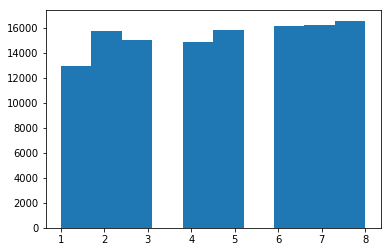

In [39]:
for i in oco_data.variables:
    print(i)
    
    
# print(oco_data.variables['footprint_vertex_latitude'][:].shape)
# print(oco_data.variables['footprint_vertex_longitude'][:].shape)
print(oco_data.variables['footprint'][:])

plt.hist(oco_data.variables['footprint'][:])

# plt.plot(oco_data.variables['footprint_vertex_longitude'][:][0], oco_data.variables['footprint_vertex_latitude'][:][0])

In [ ]:
def find_inner_regions(areas1, areas2):


In [40]:
raw_data.datasets()

{'FparExtra_QC': (('YDim:MOD_Grid_MOD15A2H', 'XDim:MOD_Grid_MOD15A2H'),
  (3678, 10145),
  21,
  3),
 'FparLai_QC': (('YDim:MOD_Grid_MOD15A2H', 'XDim:MOD_Grid_MOD15A2H'),
  (3678, 10145),
  21,
  2),
 'FparStdDev_500m': (('YDim:MOD_Grid_MOD15A2H', 'XDim:MOD_Grid_MOD15A2H'),
  (3678, 10145),
  21,
  4),
 'Fpar_500m': (('YDim:MOD_Grid_MOD15A2H', 'XDim:MOD_Grid_MOD15A2H'),
  (3678, 10145),
  21,
  0),
 'LaiStdDev_500m': (('YDim:MOD_Grid_MOD15A2H', 'XDim:MOD_Grid_MOD15A2H'),
  (3678, 10145),
  21,
  5),
 'Lai_500m': (('YDim:MOD_Grid_MOD15A2H', 'XDim:MOD_Grid_MOD15A2H'),
  (3678, 10145),
  21,
  1)}

In [3]:
import numpy as np
from shapely.geometry import Point
from shapely.geometry import Polygon

In [19]:

mat= '48.6666045 −0.2645971422 −0.2546445294 −0.1379386595 \
−0.2645971 0.0022624549 0.0010580484 −0.0001827183 \
−0.2546445 0.0010580484 0.0014918324 0.0008762569 \
−0.1379387 −0.0001827183 0.0008762569 0.0037290135'

In [20]:
mat

'48.6666045 −0.2645971422 −0.2546445294 −0.1379386595 −0.2645971 0.0022624549 0.0010580484 −0.0001827183 −0.2546445 0.0010580484 0.0014918324 0.0008762569 −0.1379387 −0.0001827183 0.0008762569 0.0037290135'

In [22]:
import numpy as np
mat = mat.replace('−', '-')
m = mat.split()
m = np.array(m)




m = m.astype(float)

In [26]:
m = m.reshape((4,4))

In [47]:

e = '5.943 \
−0.143 \
−7.040 \
−3.729 \
3.282 \
1.130 \
0.557'


In [48]:
e = e.replace('−', '-')
e = e.split()
e = np.array(e)
e = e.astype(float)

In [51]:
y = '10 \
5 \
−6 \
25 \
20 \
31 \
5'

In [53]:
y = y.replace('−', '-')
y = y.split()
y = np.array(y)
y = y.astype(float)

In [55]:
beta = '10.72 \
0.15 \
0.10 \
−1.56'

In [56]:
beta = beta.replace('−', '-')
beta = beta.split()
beta = np.array(beta)
beta = beta.astype(float)

In [62]:
SSE = np.sum(e**2)
SSE

111.16541199999999

<p>
a)</p>

<table>
<tr>
<td>Source</td>
<td>Sum of Sqaures</td>
<td>df</td>
<td>Mean</td>
<td>Squares F</td>
</tr>

<tr>
<td>Regression</td>
<td>903.69173</td>
<td>3</td>
<td>301.2306</td>
<td>8.129</td>
</tr>
<tr>
<td>Error</td>
<td>111.16541</td>
<td>3</td>
<td>37.0551</td>
<td></td>
</tr>
<tr>
<td>Total</td>
<td>1014.8571</td>
<td>6</td>
<td></td>
<td></td>
</tr>


</table>



<p>b) <br>
By doing the previous F test in a), we have obatined a test statistics of 8.129. Since the critcal value at p = 0.05 is 9.2766. We do not reject the null hypothesis, and there is no evidence that at least one estimator has a non-zero coefficient</p> 


<p>c)<br>
The unbiased variance for y is 37.05. The variance for estimated $\beta_1$ is 0.08383557703. Hence the test statistics is 0.518056443932. The degree of freedom is 3. The critical t value is 3.182. Hence we do not reject the null hypothesis, and there is no evidence that $\beta_1$ is not zero
</p>


<p>d)<br>
The variance for estimated $\beta_3$ is 0.1381791073. The test statistics for $\beta_3$ is 4.19665634218 which is greater than the critical value of 3.182. Hence we reject the null hypothesis and conclude that $\beta_3$ is not 0. 

</p>


<p>e)<br>
The model explains the variation quite well since the $R^2$ is 0.8904. 

</p>


<p>f)<br>

We are going to use F test to compare the reduced model and full model. 
$$F_{test} = \frac{MS_{diff}}{MSE_{full}}$$

We have $SS_{diff} = 121.6974 - 111.16541 = 10.5319\\
         MS_{diff} = \frac{10.5319}{(4-2)} = 5.266$
         
<br>
Hence F statistics is 5.266/37.0551 = 0.14211 with degree of freedom (4-2, 3) which is (2,3). And we do not reject the null hypothesis. Hence we conclude that there is no evidence that the full model explains the variation better than the reduced model. Hence that person's argument is correct. </p>






In [104]:
SST = np.sum((y - np.mean(y))**2)
(121.6974 - 111.16541)/2
5.266/37.0551

0.14211269164028703

In [71]:
SSR = np.sum((y - np.mean(y))**2) - SSE

In [72]:
df_r = len(y) - len(beta)

In [73]:
df_t = len(y) - 1

In [74]:
MSR = SSR/df_r
MSR


301.230576952381

In [75]:
MSE = SSE/df_r
MSE

37.055137333333327

In [76]:
MSR/MSE

8.1292527468628748

In [95]:
sigma_2 = np.sum((y - np.mean(y))**2) / (len(y) - 4)


sigma_2 = np.sum(e**2)/(len(e) -4)
print(sigma_2)
var_beta_0 = m[0,0]*sigma_2
var_beta_1 = m[1,1]*sigma_2
var_beta_2 = m[2,2]*sigma_2
var_beta_3 = m[3,3]*sigma_2

37.0551373333


In [97]:
print(var_beta_0)
print(var_beta_1)
print(var_beta_2)
print(var_beta_3)

1803.34771329
0.08383557703
0.0552800544603
0.13817910736


In [99]:
sd_beta_3 = np.sqrt(var_beta_3)
test_stats = 1.56 /sd_beta_3

print(test_stats)

4.19665634218


In [91]:
y

array([ 10.,   5.,  -6.,  25.,  20.,  31.,   5.])

In [92]:
m

array([[  4.86666045e+01,  -2.64597142e-01,  -2.54644529e-01,
         -1.37938660e-01],
       [ -2.64597100e-01,   2.26245490e-03,   1.05804840e-03,
         -1.82718300e-04],
       [ -2.54644500e-01,   1.05804840e-03,   1.49183240e-03,
          8.76256900e-04],
       [ -1.37938700e-01,  -1.82718300e-04,   8.76256900e-04,
          3.72901350e-03]])

In [101]:
SSR/(SSR+SSE)

0.89046200957207211